# Models

## Read data

In [1]:
import pandas as pd

police_stations = pd.read_csv("./new_data/police_stations.csv") # habría que usar eval() con las listas
community_areas = pd.read_csv("./new_data/community_areas.csv")

In [15]:
police_stations = pd.read_json("./new_data/police_stations.json")
community_areas = pd.read_json("./new_data/community_areas.json")

In [16]:
police_stations.head()

,station_name,community_area,longitude,latitude,ID_PS,D_distances,d_distances
0,3510 S Michigan Ave,DOUGLAS,-87.623395,41.830702,1,"[2092.19, 2103.08, 1560.8, 1750.1, 1439.87, 13...","[0, 989.7, 1360.4, 1809.6, 1227.2, 2021.8, 161..."
1,1160 N Larrabee St,NEAR NORTH SIDE,-87.643352,41.903242,2,"[1217.56, 1283.21, 686.17, 930.23, 662.57, 467...","[989.7, 0, 487.2, 992.2, 1827.8, 1154.4, 1160...."
2,850 W Addison St,LAKE VIEW,-87.651512,41.947400,3,"[784.26, 885.85, 252.87, 540.93, 298.23, 106.0...","[1360.4, 487.2, 0, 615.9, 2216.9, 709.2, 1220...."
3,5400 N Lincoln Ave,LINCOLN SQUARE,-87.692845,41.979550,4,"[478.94, 346.67, 482.46, 132.04, 511.79, 642.4...","[1809.6, 992.2, 615.9, 0, 2637.8, 373.8, 1185...."
4,1900 W Monterey Ave,MORGAN PARK,-87.668520,41.691435,5,"[3025.14, 3036.02, 2493.75, 2683.05, 2372.81, ...","[1227.2, 1827.8, 2216.9, 2637.8, 0, 2951.4, 25..."


In [17]:
community_areas.head()

,ID_CA,community_area,population,area,neighbours,criminality_index
0,1,ROGERS PARK,55628,4.77,"[1, 2, 77]",0.017029
1,2,WEST RIDGE,77122,9.14,"[1, 2, 4, 13, 77]",0.016114
2,3,UPTOWN,57182,6.01,"[3, 4, 5, 6, 77]",0.016228
3,4,LINCOLN SQUARE,40494,6.63,"[2, 3, 4, 5, 6, 13, 14, 16, 77]",0.008787
4,5,NORTH CENTER,35114,5.31,"[3, 4, 5, 6, 7, 14, 16, 21, 22]",0.005632


## Model 3

**CONSTANTS**
<br>
$I$: Number of community areas = 77 <br>
$J$: Number of police districts or police stations = 23 <br>
$K$: Number of police areas = 5 <br><br>

**DECISION VARIABLES**
<br>
$X_{i, j, k}$: 1 if police area _k_ coordinates police station _j_, which is patrolled by community area _i_, 0 otherwise; $X_{i, j, k} \in \{0,1\}$; _i_ = 1..._I_; _j_ = 1..._J_; _k_ = 1..._K_ <br>
$Y_{j, j', k}$: 1 if police station _j_ and _j'_ are coordinated by police area _k_, 0 otherwise; $Y_{j, j', k} \in \{0,1\}$; _j_ = 1..._J_; _j'_ = 1..._J_; _k_ = 1..._K_ <br>

**Derived variables**
<br>
$w_j$: Workload of police station _j_ $\equiv w_j = \sum_{i=1}^{I} \sum_{k=1}^{K} X_{i, j, k} * C_i$; $w_{j} \in \mathbb{R}$; $w_j \geq 0$; _j_ = 1..._J_ <br>
$v_k$: Workload of police area _k_ $\equiv v_k = \sum_{i=1}^{I} \sum_{j=1}^{J} X_{i, j, k} * C_i$; $v_{k} \in \mathbb{R}$; $v_k \geq 0$; _k_ = 1..._K_ <br><br>


**PARAMETERS**
<br>
$C_i$: Crime index in community area _i_; $C_i \in \mathbb{R}$; _i_=1..._I_ <br>
$D_{i,j}$: Distance from police station _j_ to community area centroid _i_;  $D_{i, j} \in \mathbb{R}$; _i_ = 1..._I_; _j_ = 1..._J_ <br>
$d_{j, j'}$: Distance from police station _j_ to police station _j'_; $d_{j, j'} \in \mathbb{R}$; _j_ = 1.._J_; _j'_ = 1.._J_ <br>
$λ$: Parameter that weights the importance of distances within the cluster; $λ \in \mathbb{R}$; $λ \geq 0$ <br>
$T$: Maximum travel time for a police station to reach the centroid of a community area; $T \in \mathbb{R}$; $T \geq 0$ <br>
$t$: Maximum travel time between two police stations within the same police area; $t \in \mathbb{R}$; $t \geq 0$ <br><br>


**OBJECTIVE FUNCTION**: Minimizing the distance from police stations to community areas and between police stations within the same police area
<br>
min Z =  $\sum_{i=1}^{I} \sum_{j=1}^{J} \sum_{k=1}^{K}X_{i,j,k}*D_{i,j}$ + λ $\sum_{j=1}^{J} \sum_{j'=1}^{J} \sum_{k=1}^{K} Y_{j, j', k}* d_{j, j'}$ <br><br>


**S.T.**:
<br>

**_Cardinality constraints_**
<br>
[Community areas] $\sum_{j=1}^{J} \sum_{k=1}^{K} X_{i, j, k} = 1$; _i_ = 1..._I_ ‎ ‎ # Each community area is patrolled by one police station <br> 
[Police stations] $\sum_{i=1}^{I} \sum_{k=1}^{K} X_{i, j, k} \geq 1$; _j_ = 1..._J_ ‎ ‎ # Each police station patrols at least one community area <br>
[Police areas] $\sum_{i=1}^{I} \sum_{j=1}^{J} X_{i, j, k} \geq 1$; _k_ = 1..._K_ ‎ ‎ # Each police area coordinates at least one police station <br>

**_Max number of X in charge of constraints_** 
<br>
[Max CA at j]  $\sum_{i=1}^{I}\sum_{k=1}^{K} X_{i, j, k} \leq 4$; _j_ = 1..._J_ ‎ ‎ # Each police station does NOT patrol more than 4 community areas <br>
[Max PS at k]  $\sum_{i=1}^{I}\sum_{j=1}^{J} X_{i, j, k} \leq 5$; _k_ = 1..._K_ ‎ ‎ # Each police area does NOT coordinate more than 5 police stations <br>

**_Distance constraints_**
<br>
[CA i, PS j] $C_{i,j} * D_{i,j} \leq T$; _i_ = 1..._I_; _j_ = 1..._J_ ‎ ‎ # Each police station only patrols a community area if it is not too far, at _T_ seconds distance maximum <br> 
[PS j, PA k] $Y_{j,j', k} * d_{j,j'} \leq t $; _j_ = 1..._J_; _j'_ = 1..._J_, _k_ = 1.._K_ ‎ ‎ # Police area coordinates police stations that are not too far between them <br>

**_Workload division constraints_**
<br>
[Job division at j] $ -0.015 \leq w_j - \frac{\sum_{j=1}^{J}w_j}{J} \leq 0.015$; _j_ = 1..._J_ ‎ ‎ # Balanced job division at police stations <br>
[Job division at k] $ -0.015 \leq v_k - \frac{\sum_{k=1}^{K}v_k}{K} \leq 0.015$; _k_ = 1..._K_ ‎ ‎ # Balanced job division at police areas <br>
[Job j] $ \sum_{i \in {5, 41, 47, 49, 65, 75}} \sum_{k=1}^{K} X_{i,j,k} \leq 1$; _j_ = 1..._J_ ‎ ‎ # Each police station can patrol only one community area with a high crime index <br>

**_Linking constraints:_**
<br>
[Linking] $\sum_{i=1}^{I} (X_{i, j, k} + X_{i, j', k}) - Y_{j, j', k} \leq 1 $; _j_ = 1..._J_; _j'_ = 1..._J_; _k_ = 1..._K_

## Code

In [4]:
from ortools.linear_solver import pywraplp

### Solver

In [5]:
solver = pywraplp.Solver.CreateSolver("BOP") ## SCIP not sure

"""
* Si todas las variables son binarias --> BOP
* Con las que NO hacer experimentos es con GLOP ni CLP al ser solver de programación lineal que asumen que todas son continuas
* Podemos probar solver comerciales que suelen ir más rápido

"""

'\n* Si todas las variables son binarias --> BOP\n* Con las que NO hacer experimentos es con GLOP ni CLP al ser solver de programación lineal que asumen que todas son continuas\n* Podemos probar solver comerciales que suelen ir más rápido\n\n'

### Constants
$I$: Number of community areas = 77 <br>
$J$: Number of police districts or police stations = 23 <br>
$K$: Number of police areas = 5

In [6]:
I, J, K = 77, 23, 5

### Decision variables
$X_{i, j, k}$: 1 if police area _k_ coordinates police station _j_, which patrols community area _i_, 0 otherwise; $X_{i, j, k} \in \{0,1\}$; _i_ = 1..._I_; _j_ = 1..._J_; _k_ = 1..._K_ <br>
$Y_{j, j', k}$: 1 if police station _j_ and _j'_ are coordinated by police area _k_, 0 otherwise; $Y_{j, j', k} \in \{0,1\}$; _j_ = 1..._J_; _j'_ = 1..._J_; _k_ = 1..._K_ 
#### Derived variables
$w_j$: Workload of police station _j_ $\equiv w_j = \sum_{i=1}^{I} \sum_{k=1}^{K} X_{i, j, k} * C_i$; $w_{j} \in \mathbb{R}$; $w_j \geq 0$; _j_ = 1..._J_ <br>
$v_k$: Workload of police area _k_ $\equiv v_k = \sum_{i=1}^{I} \sum_{j=1}^{J} X_{i, j, k} * C_i$; $v_{k} \in \mathbb{R}$; $v_k \geq 0$; _k_ = 1..._K_

In [7]:
# Decision variables

X = {}
for i in range(I):
    for j in range(J):
        for k in range(K):
            x = solver.BoolVar(f'Does Police area {k} coordinate Police station {j}, which is patrolled by Community area {i}?')
            X[(i, j, k)] = x

Y = {}
for j in range(J):
    for j_prime in range(J):
        for k in range(K):
            y = solver.BoolVar(f'Does police area {k} coordinate police station {j} and {j_prime}?')
            Y[(j, j_prime, k)] = y
            
######### AITANA: Esto en vd creo que NO se pone, en plan lo puse en el modelo para luego no tener tanta fórmula en las constraints pero que no se debería poner
            
# w = {}
# for j in range(J):
#     workload_ps = 0
#     for i in range(I):
#         for k in range(K):
#             C = community_areas['crime_index'][i] 
#             workload_ps += X[(i, j, k)] * C
#     w[j] = workload_ps
    
# v = {}
# for k in range(K):
#     workload_pa = 0
#     for i in range(I):
#         for j in range(J):
#             C = community_areas['crime_index'][i] 
#             workload_pa += X[(i, j, k)] * C
#     v[k] = workload_pa

### Objective function
Minimizing the distance from police stations to community areas and between police stations within the same police area
<br>
min Z =  $\sum_{i=1}^{I} \sum_{j=1}^{J} \sum_{k=1}^{K}X_{i,j,k}*D_{i, j}$ + λ $\sum_{j=1}^{J} \sum_{j'=1}^{J} \sum_{k=1}^{K} Y_{j, j', k}* d_{j, j'}$ <br>

In [19]:
# Objective function

objective = solver.Objective()
objective.SetMinimization()

for i in range(I):
    for j in range(J):
        for k in range(K):
            x = X[(i, j, k)]
            D = police_stations['D_distances'][j][i]
            objective.SetCoefficient(x, D)


######### AITANA: lambda es un valor completamente arbitario, hay que ir probando

lbd = 0.5  ####

for j in range(J):
    for j_prime in range(J):
        for k in range(K):
            y = Y[(j, j_prime, k)]
            d = police_stations['d_distances'][j][j_prime]
            objective.SetCoefficient(y, lbd*d)  

### Constraints
**_Cardinality constraints_**
<br>
[Community areas] $\sum_{j=1}^{J} \sum_{k=1}^{K} X_{i, j, k} = 1$; _i_ = 1..._I_ ‎ ‎ # Each community area is patrolled by one police station <br> 
[Police stations] $\sum_{i=1}^{I} \sum_{k=1}^{K} X_{i, j, k} \geq 1$; _j_ = 1..._J_ ‎ ‎ # Each police station patrols at least one community area <br>
[Police areas] $\sum_{i=1}^{I} \sum_{j=1}^{J} X_{i, j, k} \geq 1$; _k_ = 1..._K_ ‎ ‎ # Each police area coordinates at least one police station <br>

In [20]:
ca_constraints = []
for i in range(I):
    constraint = solver.Constraint(1, 1)
    for j in range(J):
        for k in range(K):
            x = X[(i, j, k)]
            constraint.SetCoefficient(x, 1)
    ca_constraints.append(constraint)
    
ps_constraints = []
for j in range(J):
    constraint = solver.Constraint(1, solver.infinity())
    for i in range(I):
        for k in range(K):
            x = X[(i, j, k)]
            constraint.SetCoefficient(x, 1)
    ps_constraints.append(constraint)
    
pa_constraints = []
for k in range(K):
    constraint = solver.Constraint(1, solver.infinity())
    for i in range(I):
        for j in range(J):
            x = X[(i, j, k)]
            constraint.SetCoefficient(x, 1)
    pa_constraints.append(constraint)

**_Max number of X in charge of constraints_** 
<br>
[Max CA at j]  $\sum_{i=1}^{I} \sum_{k=1}^{K} X_{i, j, k} \leq 4$; _j_ = 1..._J_ ‎ ‎ # Each police station does NOT patrol more than 4 community areas <br>
[Max PS at k]  $\sum_{i=1}^{I} \sum_{j=1}^{J} X_{i, j, k} \leq 5$; _k_ = 1..._K_ ‎ ‎ # Each police area does NOT coordinate more than 5 police stations <br>

In [21]:
max1_constraints = []
for j in range(J):
    constraint = solver.Constraint(-solver.infinity(), 4)
    for i in range(I):
        for k in range(K):
            x = X[(i, j, k)]
            constraint.SetCoefficient(x, 1)
    max1_constraints.append(constraint)
    
max2_constraints = []
for j in range(J):
    constraint = solver.Constraint(-solver.infinity(), 5)
    for i in range(I):
        for k in range(K):
            x = X[(i, j, k)]
            constraint.SetCoefficient(x, 1)
    max2_constraints.append(constraint)

**_Distance constraints_**
<br>
[CA i, PS j] $\sum_{k=1}^{K} X_{i, j, k} * D_{i,j} \leq T$; _i_ = 1..._I_; _j_ = 1..._J_ ‎ ‎ # Each police station only patrols a community area if it is not too far, at _T_ seconds distance maximum <br> 
[PS j, PA k] $Y_{j,j', k} * d_{j,j'} \leq t $; _j_ = 1..._J_; _j'_ = 1..._J_, _k_ = 1.._K_ ‎ ‎ # Police area coordinates police stations that are not too far between them <br>

In [27]:
T = 1200
t = 1200

distance1_constraints = []
for i in range(I): 
    for j in range(J):
        constraint = solver.Constraint(T, solver.infinity())  ##### AITANA: ¿esto no sería al revés?
        for k in range(K):
            x = X[(i, j, k)]
            D = police_stations['D_distances'][j][i]
            constraint.SetCoefficient(x, D)
        distance1_constraints.append(constraint)
        
distance2_constraints = []                                  ##### AITANA: esto igual lo cambiaría a sumatorio
for j in range(J):
    for j_prime in range(J):
        for k in range(K):
            constraint = solver.Constraint(t, solver.infinity())
            y = Y[(j, j_prime, k)]
            d = police_stations['d_distances'][j][j_prime]
            constraint.SetCoefficient(y, d)
            distance2_constraints.append(constraint)

**_Workload division constraints_**
<br>
[Job division at j] $ -0.015 \leq w_j - \frac{\sum_{j=1}^{J}w_j}{J} \leq 0.015$; _j_ = 1..._J_ ‎ ‎ # Balanced job division at police stations <br>
[Job division at k] $ -0.015 \leq v_k - \frac{\sum_{k=1}^{K}v_k}{K} \leq 0.015$; _k_ = 1..._K_ ‎ ‎ # Balanced job division at police areas <br>
[Job j] $ \sum_{i \in {5, 41, 47, 49, 65, 75}} \sum_{k=1}^{K} X_{i,j,k} \leq 1$; _j_ = 1..._J_ ‎ ‎ # Each police station can patrol only one community area with a high crime index <br>

In [30]:
"""
workload1_constraints = []
for j in range(J):
    constraint = solver.Constraint(-0.015, 0.015)
    constraint.SetCoefficient(w[j], 1)
    ## por completar
    

workload2_constraints = []
for k in range(K):
    constraint = solver.Constraint(-0.015, 0.015)  # aquí quizás cambiaría el rango, porque se trata de crime index de ps
    ## por completar
"""

workload3_constraints = []
for j in range(J):
    constraint = solver.Constraint(-solver.infinity(), 1)
    for i in [5, 41, 47, 49, 65, 75]:
        for k in range(K):
            x = X[(i, j, k)]
            constraint.SetCoefficient(x, 1)
    workload3_constraints.append(constraint)

In [ ]:
######### AITANA: propuesta 0

workload1_constraints = []
for j in range(J):
    # Restringir w[j] - 1/23 dentro del rango [-0.015, 0.015]
    constraint = solver.Constraint(-0.015, 0.015)
    constraint.SetCoefficient(w[j], 1)
    constraint.SetOffset(-1 / 23)
    workload1_constraints.append(contraint)
    
workload2_constraints = []
for k in range(K):
    # Restringir v[k] - 1/5 dentro del rango [-0.015, 0.015]
    constraint = solver.Constraint(-0.015, 0.015)
    constraint.SetCoefficient(v[k], 1)
    constraint.SetOffset(-1 / 5)
    workload2_constraints.append(contraint)




In [33]:
######### AITANA: propuesta 1

workload1_constraints = []
for j in range(J):
    # Definir w_j como suma ponderada de X
    workload_j = solver.Sum(
        solver.Sum(X[(i, j, k)] * community_areas['criminality_index'][i] for i in range(I))
        for k in range(K))
    
    # balance de carga w_j
    constraint = solver.Constraint(-0.015, 0.015)
    constraint.SetCoefficient(workload_j, 1)  # Coeficiente para w_j
    constraint.SetCoefficient(1 / 23, -1)     # Restar el promedio 1/23
    workload1_constraints.append(constraint)

workload2_constraints = []
for k in range(K):
    # Definir v_k como suma ponderada de X
    workload_k = solver.Sum(
        solver.Sum(X[(i, j, k)] * community_areas['criminality_index'][i] for i in range(I))
        for j in range(J))
    
    # balance de carga v_k
    constraint = solver.Constraint(-0.015, 0.015)
    constraint.SetCoefficient(workload_k, 1)  # Coeficiente para v_k
    constraint.SetCoefficient(1 / 5, -1)      # Restar el promedio 1/5
    workload2_constraints.append(constraint)



SystemError: <built-in function Constraint_SetCoefficient> returned NULL without setting an exception

In [35]:
######### AITANA: propuesta 2


for j in range(J):
    # Calcular w_j como suma ponderada de las áreas que patrulla la estación j
    workload_j = solver.Sum(
        solver.Sum(X[(i, j, k)] * community_areas['criminality_index'][i] for i in range(I))
        for k in range(K)
    )
    
    # Restringir w_j - 1/23 dentro del rango [-0.015, 0.015]
    constraint = solver.Constraint(-0.015, 0.015)
    constraint.SetCoefficient(workload_j, 1)
    constraint.SetOffset(-1 / 23)

for k in range(K):
    # Calcular v_k como suma ponderada de las áreas coordinadas por el área policial k
    workload_k = solver.Sum(
        solver.Sum(X[(i, j, k)] * community_areas['criminality_index'][i] for i in range(I))
        for j in range(J)
    )
    
    # Restringir v_k - 1/5 dentro del rango [-0.015, 0.015]
    constraint = solver.Constraint(-0.015, 0.015)
    constraint.SetCoefficient(workload_k, 1)
    constraint.SetOffset(-1 / 5)



SystemError: <built-in function Constraint_SetCoefficient> returned NULL without setting an exception

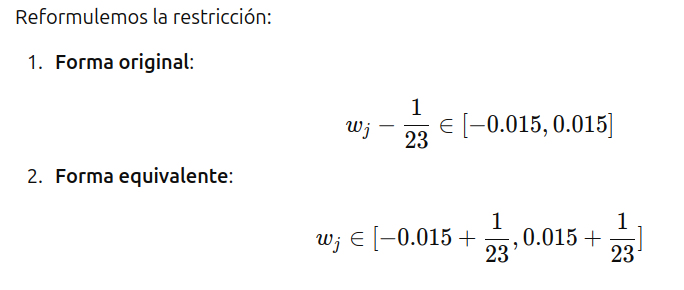

In [38]:
# Restricciones para w_j - 1/23
for j in range(J):
    # Calcular nuevos límites ajustados
    lower_bound = -0.015 + (1 / 23)
    upper_bound = 0.015 + (1 / 23)
    
    # Crear la restricción con límites ajustados
    constraint = solver.Constraint(lower_bound, upper_bound)
    
    # Sumar las contribuciones de las áreas comunitarias coordinadas
    for i in range(I):
        for k in range(K):
            C = community_areas['criminality_index'][i]
            x = X[(i, j, k)]
            constraint.SetCoefficient(x, C)  # Agregar el peso de la carga de trabajo

# Restricciones para v_k - 1/5
for k in range(K):
    # Calcular nuevos límites ajustados
    lower_bound = -0.015 + (1 / 5)
    upper_bound = 0.015 + (1 / 5)
    
    # Crear la restricción con límites ajustados
    constraint = solver.Constraint(lower_bound, upper_bound)
    
    # Sumar las contribuciones de las áreas comunitarias coordinadas
    for i in range(I):
        for j in range(J):
            C = community_areas['criminality_index'][i]
            x = X[(i, j, k)]
            constraint.SetCoefficient(x, C)  # Agregar el peso de la carga de trabajo


**_Linking constraints:_**
<br>
[Linking] $\sum_{i=1}^{I} (X_{i, j, k} + X_{i, j', k}) - Y_{j, j', k} \leq 1 $; _j_ = 1..._J_; _j'_ = 1..._J_; _k_ = 1..._K_

In [39]:
linking_constraints = []
for j in range(J):
    for j_prime in range(J):
        for k in range(K):
            constraint = solver.Constraint(-solver.infinity(), 1)
            y = Y[(j, j_prime, k)]
            constraint.SetCoefficient(y, -1)
            for i in range(I):
                x = X[(i, j, k)]
                x_prime = X[(i, j, k)]
                constraint.SetCoefficient(x, 1)
                constraint.SetCoefficient(x_prime, 1)
linking_constraints.append(constraint)

### Results

In [40]:
result = solver.Solve()
if result == solver.ABNORMAL:
    print("Execution finished by an error")
elif result == solver.FEASIBLE:
    print("In the specified time limit the solver has found a feasible solution")
    for i in range(I):
        for j in range(J):
            for k in range(K):
                x = X[(i, j, k)]
        if x.SolutionValue()>0:
            print(x, x.solution_value())

    print("The value for the objective function is", objective.Value())
elif result == solver.INFEASIBLE:
    print("There is no feasible solution for the problem")
elif result == solver.NOT_SOLVED:
    print("In the specified time limit the solver has not found any feasible solution")
elif result == solver.OPTIMAL:
    print("In the specified time limit the solver has found a feasible solution")
    for i in range(I):
        for j in range(J):
            for k in range(K):
                x = X[(i, j, k)]
        if x.SolutionValue()>0:
            print(x, x.solution_value())
    print("The optimal value for the objective function is", objective.Value())
elif result == solver.UNBOUNDED:
    print("The solution is unbounded")
else:
    print("Unknown error code")

There is no feasible solution for the problem


W0000 00:00:1732541746.975279   19661 integral_solver.cc:655] A constraint is trivially unsatisfiable.
I0000 00:00:1732541746.981746   19661 boolean_problem.cc:259] Problem detected to be UNSAT when adding the constraint #180 with name 'r180'
